# Support Vector Machines (SVMs)

So far we have used logistic regression to create our machine learning model. We will now cover some alternative methods, starting with Support Vector Machines. We can keep nearly of our code. In fact we only have to change the three lines in the 'train mode' function.

We'll re-use the logistic regression code for looking for appropriate regularisation of the model (to avoid over-fitting of the model to the training data). Our three lines of code which define the model are now:

    from sklearn.svm import SVC
    model=SVC(kernel='linear',C=c)
    model.fit(X_train_std,y_train)
    
(C is the regularisation term which we will vary in order to find the optimum).

SVMs can use a variety of methods to fit. Two common methods are linear (as used here) where data may be separated and classified by a series of intersecting lines, and rbf (radial basis function) where data is classified according to similarity to existing data points/clusters. We'll just stick with the linear kernal in this example, but when using svm you may wish to try alternative kernals: polynomial, rbf, sigmoid.

For more background on SVMs see: https://en.wikipedia.org/wiki/Support_vector_machine

            training_accuracy  test_accuracy           c
c                                                       
0.0001               0.626761       0.629371      0.0001
0.0010               0.626761       0.629371      0.0010
0.0100               0.626761       0.629371      0.0100
0.1000               0.953052       0.944056      0.1000
1.0000               0.985915       0.979021      1.0000
10.0000              0.992958       0.972028     10.0000
100.0000             1.000000       0.965035    100.0000
1000.0000            1.000000       0.965035   1000.0000
10000.0000           1.000000       0.965035  10000.0000


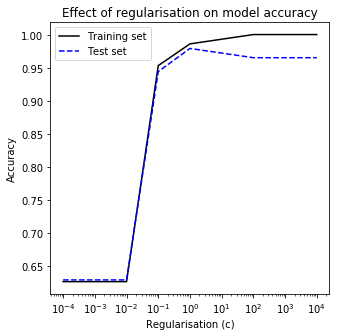

In [6]:
# import required modules

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_diagnostic_performance (actual_predicted):
    """ We will calculated only accuracy in this model """
    
    performance ={}
    test_correct = actual_predicted[:, 0] == actual_predicted[:, 1]
    performance['accuracy'] = np.average(test_correct)

    return performance

def chart_results(results):
    x = results['c']
    y1 = results['training_accuracy']
    y2 = results['test_accuracy']
    
    # Create figure
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.plot(x,y1, color='k',linestyle='solid', label = 'Training set')
    ax.plot(x,y2, color='b',linestyle='dashed', label = 'Test set')    
    ax.set_xscale('log')
    ax.set_xlabel('Regularisation (c)')
    ax.set_ylabel('Accuracy')
    plt.title('Effect of regularisation on model accuracy')
    plt.legend()
    plt.show()



def load_data ():
    """Load the data set. Here we load the Breast Cancer Wisconsin (Diagnostic)
    Data Set. Data could be loaded from other sources though the structure
    should be compatible with thi sdata set, that is an object with the 
    following attribtes:
        .data (holds feature data)
        .feature_names (holds feature titles)
        .target_names (holds outcome classification names)
        .target (holds classification as zero-based number)
        .DESCR (holds text-based description of data set)"""
    
    data_set = datasets.load_breast_cancer()
    return data_set

def normalise (X_train,X_test):
    """Normalise X data, so that training set has mean of zero and standard
    deviation of one"""
    
    # Initialise a new scaling object for normalising input data
    sc=StandardScaler() 
    # Set up the scaler just on the training set
    sc.fit(X_train)
    # Apply the scaler to the training and test sets
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    return X_train_std, X_test_std

def print_diagnostic_results (performance):
    """Iterate through, and print, the performance metrics dictionary"""
    
    print('\nMachine learning diagnostic performance measures:')
    print('-------------------------------------------------')
    for key, value in performance.items():
        print (key,'= %0.3f' %value) # print 3 decimal places
    return

def split_data (data_set, split=0.25):
    """Extract X and y data from data_set object, and split into tarining and
    test data. Split defaults to 75% training, 25% test if not other value 
    passed to function"""
    
    X=data_set.data
    y=data_set.target
    X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=split)
    return X_train,X_test,y_train,y_test

def test_model(model, X, y):
    """Return predicted y given X (attributes)"""
    
    y_pred = model.predict(X)
    test_results = np.vstack((y, y_pred)).T
    return test_results

def train_model (X, y, c):
    """Train the model """
    
    from sklearn.svm import SVC
    model=SVC(kernel='rbf',C=c)
    model.fit(X_train_std,y_train)
    return model

###### Main code #######

# Load data
data_set = load_data()



# List of regularisation values
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
training_accuracy = []
test_accuracy = []
c_results = [] # record c

for c in c_list:

    for i in range(1000): # repeat model for better estimation of optimal C
        
        # Split data into trainign and test sets
        X_train,X_test,y_train,y_test = split_data(data_set, 0.25)

        # Normalise data
        X_train_std, X_test_std = normalise(X_train,X_test)
        # Repeat test 1000x per level of c
        c_results.append(c)
        
        # Train model
        model = train_model(X_train_std,y_train, c)

        # Produce results for training set
        test_results = test_model(model, X_train_std, y_train)
        performance = calculate_diagnostic_performance(test_results)
        training_accuracy.append(performance['accuracy'])

        # Produce results for test set
        test_results = test_model(model, X_test_std, y_test)
        performance = calculate_diagnostic_performance(test_results)
        test_accuracy.append(performance['accuracy'])

results = pd.DataFrame()
results['c'] = c_results
results['training_accuracy'] = training_accuracy
results['test_accuracy'] = test_accuracy
summary = results.groupby('c').median()
summary['c'] = list(summary.index)

print (summary)
chart_results (summary)


So, we get about 97% accuracy with regularisation (C) of about 1, though we do not see such a pronounced peak as we did with the polynomial regression. As with logistic regression we may wish also to look at learning rate to understand whether out model accuracy is being signficantly hampered by lack of data.